<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-JuanLeonelSantamariaMena/blob/main/Sep30/ejercicio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [199]:
from google.colab import drive
drive.mount('/content/drive')
data=np.loadtxt("/content/drive/MyDrive/Colab Notebooks/olympic100m_men.txt",delimiter = ',').T
x=data[0]
y=data[1]

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [200]:
x=(x-np.mean(x))/np.std(x)


$$P(\vec{\omega}|Data)\propto \ell (Data|\vec{\omega})Pr(\vec{\omega})$$

$$ln L \propto \sum_i(y_i-Model(x_i,\vec{\omega})^2$$

#no infomativo

$$pr(\theta)=\frac{1}{\theta_{max}-\theta_{min}}$$

#informativos

$$Pr(\theta)\propto e^{(\theta -\mu_\theta)^2/2\sigma^2_\theta}$$

$f=w_0+w_1x$ parametros libre $w_0,w_1$

$\sigma$

* 1) $\theta_{ini}=[]$
* 2) $\theta_{prop}=[gaussian(\theta_ini[0],\sigma),gaussian(\theta_ini[1],\sigma)]$
* 3) Evaluar $ln Post(\theta_{ini}), ln Post (theta_{prop})$
  * si $ln Post(\theta_{prop})>ln Post (theta_{ini})$
    * acepto $\theta_{prop}$
    * guardar $\theta_{prop}$
  * si no :
  * post= uniform (0,1)
  * si $ln post(\theta_{prop}) - ln post(\theta_{ini})> ln post(post)$
    * acepto $\theta_{prop}$
    * guardar $\theta_{prop}$
    * $\theta_{ini}= \theta_{prop}$


In [290]:
#modelo lienal
def model(x,theta):
  f = 0.0
  for i in range(len(theta)):
    f+= theta[i]*x**i
  return f

#prior
def prior(lim,theta):
  if lim[0,1]> theta[0] >lim[0,0] and lim[1,1]> theta[1] >lim[1,0]:
    pr=1
  else:
    pr=0
  return pr

#likelihood
def likelihood(x,y,theta, model):
  lnL=0.0
  for i in range(len(x)):
    lnL += -0.5*(y[i]-model(x[i],theta))**2
  return lnL

#Monte Carlo Markov Chain Metropolis Algorithm
# Cadenas de Markov Algoritmo Metropolos
def CM_AM(x,y,theta,sigma0,sigma1,lim,iter,model):
  # distribucion de theta
  dist_theta=[]
  dist_theta.append(theta)
  for i in range(iter):
    theta_prop=[np.random.normal(theta[0],sigma0),np.random.normal(theta[1],sigma1)]
    lnPost_prop=likelihood(x,y,theta_prop,model)+ np.log(prior(lim,theta_prop))
    lnPost_ini=likelihood(x,y,theta,model)+ np.log(prior(lim,theta))
    if lim[0,1]> theta_prop[0] >lim[0,0] and lim[1,1]> theta_prop[1] >lim[1,0]:
      # lnPost= ln L + ln Pr


      if lnPost_prop > lnPost_ini:
        dist_theta.append(theta_prop)
        theta=theta_prop
        #print(f'postirios: {i}: theta{theta_prop} : prop={lnPost_prop} : ini={lnPost_ini}')

      elif lnPost_prop - lnPost_ini > np.log(np.random.uniform(0,1)):
        dist_theta.append(theta_prop)
        theta=theta_prop
        #print(f'postirios: {i}: theta{theta_prop} : prop={lnPost_prop} : ini={lnPost_ini}')


  return dist_theta

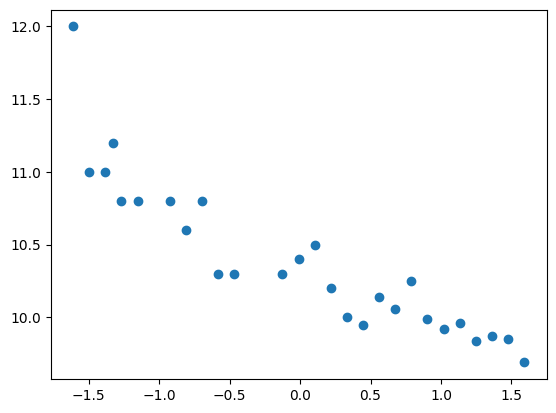

In [107]:
plt.scatter(x,y)

<ipython-input-290-74ac0e575bd6>:32: RuntimeWarning: divide by zero encountered in log
  lnPost_ini=likelihood(x,y,theta,model)+ np.log(prior(lim,theta))


[10.31088725 -0.67947336]
[10.45590265 -0.30849733]


0.0218

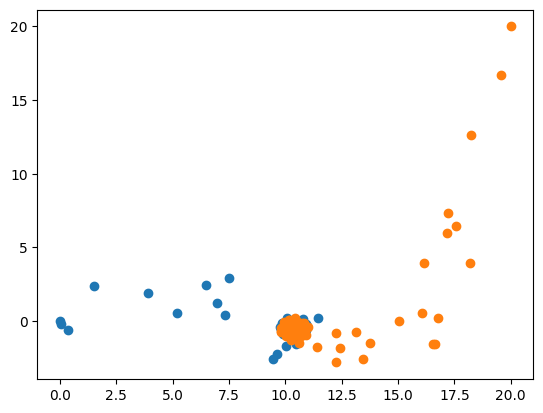

In [291]:
w0=0.0
w1=0.0
sigma0=1
sigma1=3
#iteracion
iter=10000
lim= np.asmatrix([[-20,20],[-20,20]])
#lim= np.asmatrix([[-50,50],[-1,0]])
theta=[w0,w1]
dis_theta=CM_AM(x,y,theta,sigma0,sigma1,lim,iter,model)
dis_theta=np.array(dis_theta).T
dis_theta1=CM_AM(x,y,[20,20],sigma0,sigma1,lim,iter,model)
dis_theta1=np.array(dis_theta1).T
plt.scatter(dis_theta[0],dis_theta[1])
plt.scatter(dis_theta1[0],dis_theta1[1])
print(dis_theta.T[-1])
print(dis_theta1.T[-1])
RA=len(dis_theta.T)/iter
RA

In [58]:
#radio de aceptacion


RA=len(dis_theta.T)/iter

#Run correr en diferetes puntos


2541

(array([13.,  3.,  6.,  4.,  2.,  4., 19.,  5.,  2., 17.]),
 array([10.31615229, 11.20031125, 12.08447021, 12.96862917, 13.85278813,
        14.73694709, 15.62110605, 16.50526501, 17.38942396, 18.27358292,
        19.15774188]),
 <BarContainer object of 10 artists>)

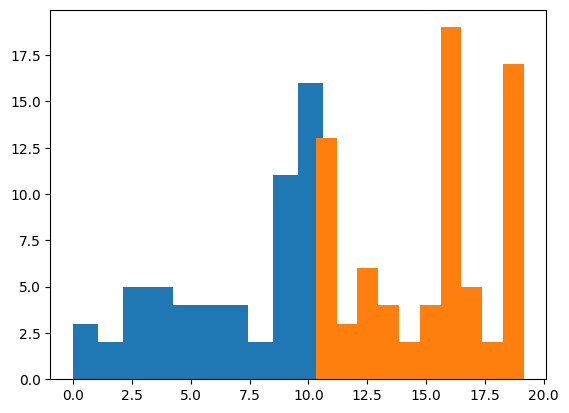

In [212]:
plt.hist(dis_theta[0])
plt.hist(dis_theta1[0])

(array([32.,  5.,  5.,  6.,  4.,  4.,  6.,  4.,  3.,  6.]),
 array([-1.12490796,  0.88758284,  2.90007363,  4.91256443,  6.92505522,
         8.93754602, 10.95003682, 12.96252761, 14.97501841, 16.9875092 ,
        19.        ]),
 <BarContainer object of 10 artists>)

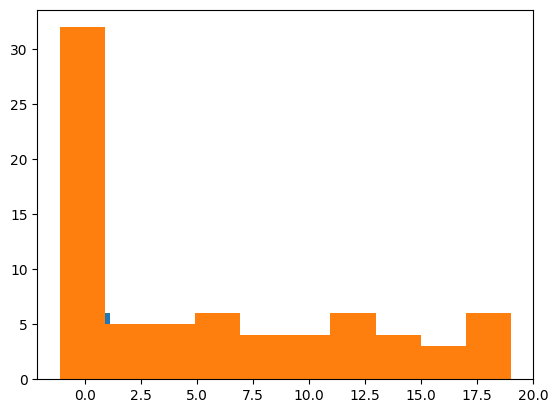

In [213]:
plt.hist(dis_theta[1])
plt.hist(dis_theta1[1])